<a href="https://colab.research.google.com/github/SonHyeok/Marine-distress-accident/blob/main/Marine_distress_accident.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ● 해양 조난 사고 데이터 분석


## 1. 데이터셋 불러오기 및 데이터 정제

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
pip install bokeh

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import bokeh
from bokeh.io import output_file, show
from bokeh.plotting import figure, output_notebook, show
import seaborn as sns

In [4]:
#한글폰트 다운로드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#한글폰트 설정
plt.rc('font', family='NanumBarunGothic') 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [5]:
df = pd.read_csv('/content/drive/MyDrive/개인 공공데이터 분석 자료/data/해양경찰청_해상조난사고 상세데이터 현황_20201231.csv', encoding='cp949')

## 데이터 분포 및 결측값 확인

In [6]:
df

,발생일시,월별,시간대별,관할해경서,발생해역,위도,경도,기상상태,발생원인,발생유형,사고선박수,발생인원,구조,부상,사망,실종,선 종,톤수
0,2020-12-30 08:34,12,8,평택,항계 내,36 | 57 | 0,126 | 50 | 1,황천6급,관리소홀,기타,1,0,0,0,0,0,유조선,169.00
1,2020-12-30 00:26,12,0,부산,항계 내,35 | 5 | 39,129 | 2 | 17,풍랑주의보,화기취급부주의,화재,1,0,0,0,0,0,유조선,32.00
2,2020-12-29 23:33,12,23,부산,영해-EEZ,34 | 46 | 40,129 | 9 | 19,풍랑주의보,정비불량,기관손상,1,8,8,0,0,0,어선,87.00
3,2020-12-29 22:41,12,22,목포,영해,34 | 57 | 15,126 | 4 | 43,풍랑주의보,기상악화,부유물감김,1,4,4,0,0,0,예부선,124.00
4,2020-12-29 22:41,12,22,목포,영해,34 | 57 | 15,126 | 4 | 43,풍랑주의보,기상악화,표류,1,23,23,0,0,0,예부선,600.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3773,2020-01-01 14:00,1,14,서귀포,영해-EEZ,33 | 17 | 44,127 | 11 | 30,양호,운항부주의,부유물감김,1,7,7,0,0,0,어선,29.00
3774,2020-01-01 13:03,1,13,울산,영해,35 | 22 | 58,129 | 21 | 18,황천6급,정비불량,추진기손상,1,1,1,0,0,0,어선,2.31
3775,2020-01-01 12:11,1,12,창원,항계 내,35 | 5 | 25,128 | 47 | 12,양호,정비불량,기관손상,1,3,3,0,0,0,모터보트,2.90
3776,2020-01-01 11:14,1,11,군산,영해,35 | 52 | 50,126 | 21 | 10,양호,운항부주의,침수,1,1,1,0,0,0,어선,1.18


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3778 entries, 0 to 3777
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   발생일시    3778 non-null   object 
 1   월별      3778 non-null   int64  
 2   시간대별    3778 non-null   int64  
 3   관할해경서   3778 non-null   object 
 4   발생해역    3778 non-null   object 
 5   위도      3778 non-null   object 
 6   경도      3778 non-null   object 
 7   기상상태    3778 non-null   object 
 8   발생원인    3778 non-null   object 
 9   발생유형    3778 non-null   object 
 10  사고선박수   3778 non-null   int64  
 11  발생인원    3778 non-null   int64  
 12  구조      3778 non-null   int64  
 13  부상      3778 non-null   int64  
 14  사망      3778 non-null   int64  
 15  실종      3778 non-null   int64  
 16  선 종     3778 non-null   object 
 17  톤수      3778 non-null   float64
dtypes: float64(1), int64(8), object(9)
memory usage: 531.4+ KB


In [8]:
df.head(5)
# 위도 경도를 사용하는거 보다는 관할 해경서를 통해 어느 영해에서 일어나느지 보는게 좋을듯(큰 범주로)
#발생인원이 0명인 곳은 정박돼있는 중에 사고가 난듯

,발생일시,월별,시간대별,관할해경서,발생해역,위도,경도,기상상태,발생원인,발생유형,사고선박수,발생인원,구조,부상,사망,실종,선 종,톤수
0,2020-12-30 08:34,12,8,평택,항계 내,36 | 57 | 0,126 | 50 | 1,황천6급,관리소홀,기타,1,0,0,0,0,0,유조선,169.0
1,2020-12-30 00:26,12,0,부산,항계 내,35 | 5 | 39,129 | 2 | 17,풍랑주의보,화기취급부주의,화재,1,0,0,0,0,0,유조선,32.0
2,2020-12-29 23:33,12,23,부산,영해-EEZ,34 | 46 | 40,129 | 9 | 19,풍랑주의보,정비불량,기관손상,1,8,8,0,0,0,어선,87.0
3,2020-12-29 22:41,12,22,목포,영해,34 | 57 | 15,126 | 4 | 43,풍랑주의보,기상악화,부유물감김,1,4,4,0,0,0,예부선,124.0
4,2020-12-29 22:41,12,22,목포,영해,34 | 57 | 15,126 | 4 | 43,풍랑주의보,기상악화,표류,1,23,23,0,0,0,예부선,600.0


In [9]:
df.tail(5)

,발생일시,월별,시간대별,관할해경서,발생해역,위도,경도,기상상태,발생원인,발생유형,사고선박수,발생인원,구조,부상,사망,실종,선 종,톤수
3773,2020-01-01 14:00,1,14,서귀포,영해-EEZ,33 | 17 | 44,127 | 11 | 30,양호,운항부주의,부유물감김,1,7,7,0,0,0,어선,29.00
3774,2020-01-01 13:03,1,13,울산,영해,35 | 22 | 58,129 | 21 | 18,황천6급,정비불량,추진기손상,1,1,1,0,0,0,어선,2.31
3775,2020-01-01 12:11,1,12,창원,항계 내,35 | 5 | 25,128 | 47 | 12,양호,정비불량,기관손상,1,3,3,0,0,0,모터보트,2.90
3776,2020-01-01 11:14,1,11,군산,영해,35 | 52 | 50,126 | 21 | 10,양호,운항부주의,침수,1,1,1,0,0,0,어선,1.18
3777,2020-01-01 01:00,1,1,동해,공해,37 | 26 | 43,133 | 24 | 35,풍랑주의보,운항부주의,부유물감김,1,13,13,0,0,0,어선,89.00


In [10]:
df.isnull(  ).sum()

발생일시     0
월별       0
시간대별     0
관할해경서    0
발생해역     0
위도       0
경도       0
기상상태     0
발생원인     0
발생유형     0
사고선박수    0
발생인원     0
구조       0
부상       0
사망       0
실종       0
선 종      0
톤수       0
dtype: int64

## 간단한 시각화를 통한 데이터 이해

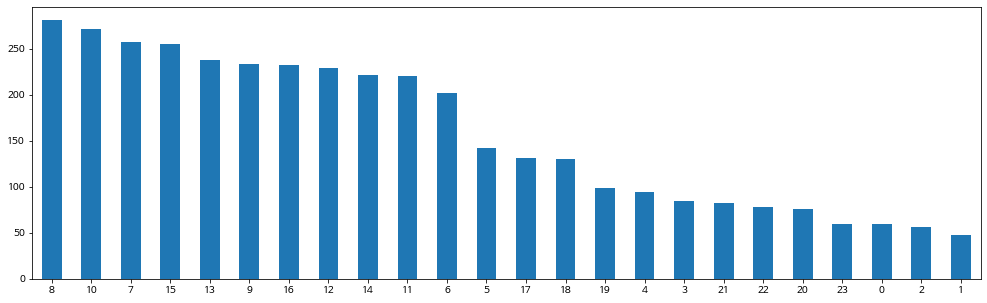

In [11]:
df['시간대별'].value_counts().plot.bar(rot = 0, figsize=(17,5))

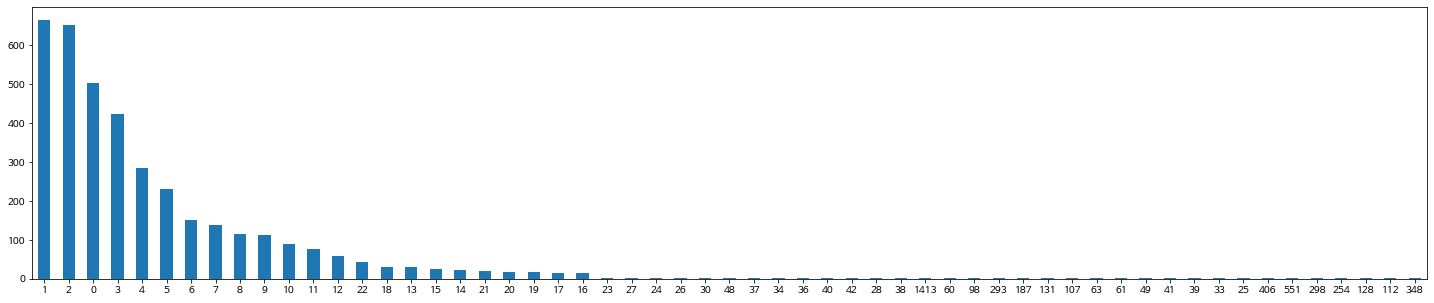

In [12]:
df['발생인원'].value_counts().plot.bar(rot = 0, figsize=(25,5))

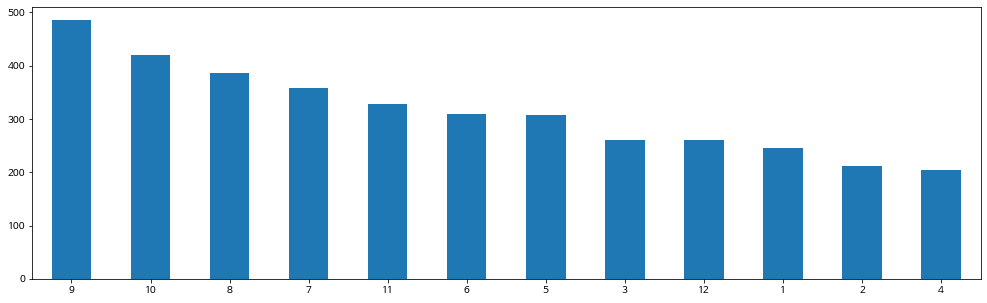

In [13]:
df['월별'].value_counts().plot.bar(rot = 0, figsize=(17,5))

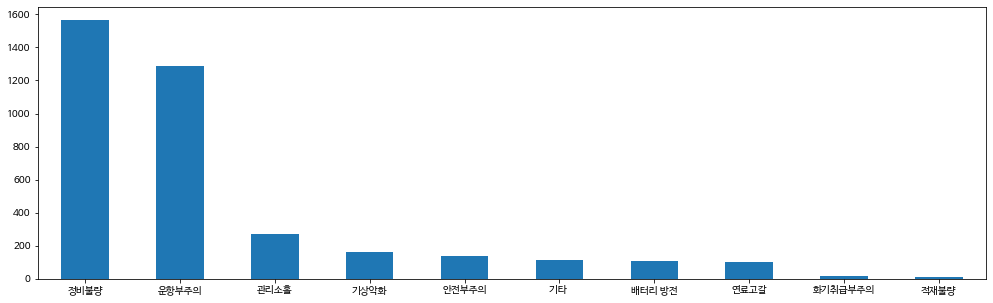

In [14]:
df['발생원인'].value_counts().plot.bar(rot = 0, figsize=(17,5))

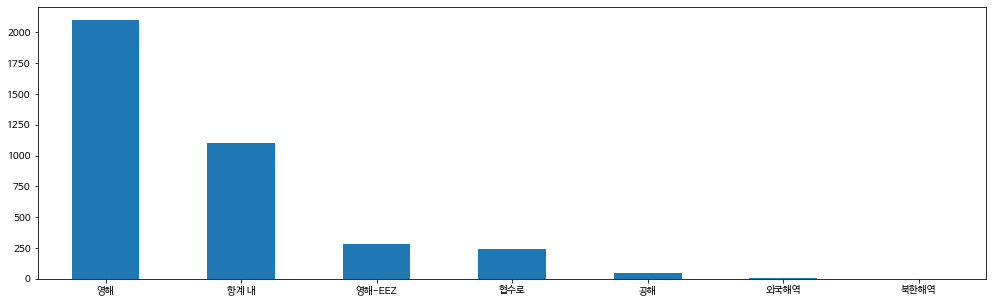

In [15]:
df['발생해역'].value_counts().plot.bar(rot = 0, figsize=(17,5))
# 영해 = 나라의 주권이 미치는 해역
# eez = 경제적 주권을 행사 하겠다고 선포한 해역
#협수로 = 항로 또는 수로의 폭이 좁은 곳
#공해 = 어느 나라의 주권에도 속하지 않으며, 모든 나라가 공통으로 사용할 수 있는 바다

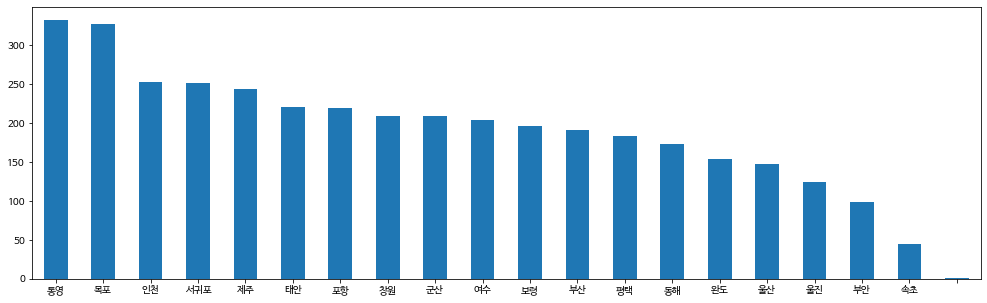

In [16]:
df['관할해경서'].value_counts().plot.bar(rot = 0, figsize=(17,5))
# 영해 별로 묶어서 나타내보기

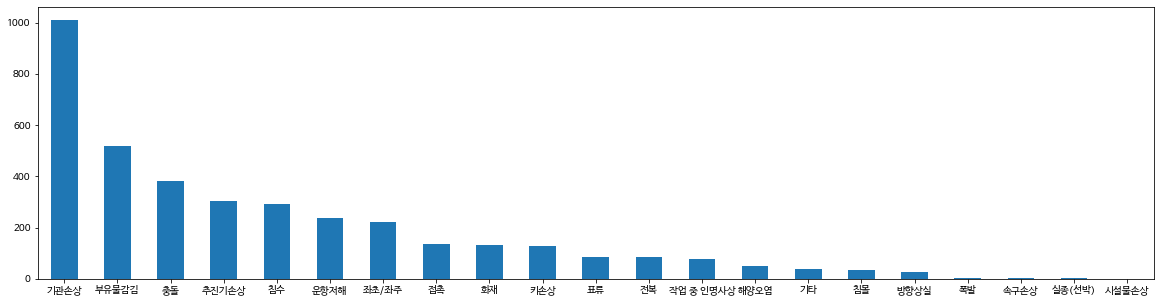

In [17]:
df['발생유형'].value_counts().plot.bar(rot = 0, figsize=(20,5))

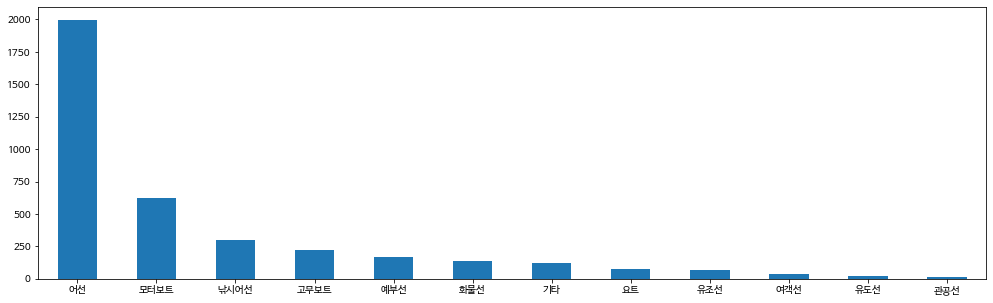

In [18]:
df['선 종'].value_counts().plot.bar(rot = 0, figsize=(17,5))

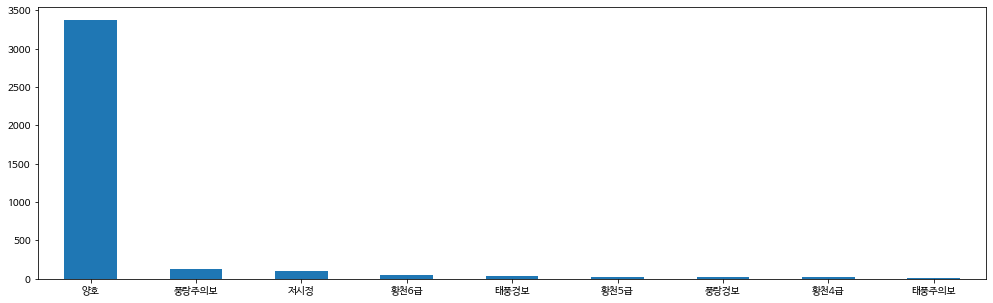

In [19]:
df['기상상태'].value_counts().plot.bar(rot = 0, figsize=(17,5))

## 데이터 프레임 생성

In [20]:
df_pe = pd.pivot_table(df, index=['발생인원'], values=['구조','부상','실종','사망'], aggfunc='sum')


#1. 월별 데이터 상관관계 확인

## 각 월마다 시간대별 사고 발생수 확인


In [21]:
# 각 월별 어느 시간에 가장 많이 사고가 발생했는지 확인하기 위해서 월별 데이터셋 생성
df_month_1 = df[df['월별'] == 1]['시간대별'].value_counts().to_frame()
df_month_2 = df[df['월별'] == 2]['시간대별'].value_counts().to_frame()
df_month_3 = df[df['월별'] == 3]['시간대별'].value_counts().to_frame()
df_month_4 = df[df['월별'] == 4]['시간대별'].value_counts().to_frame()
df_month_5 = df[df['월별'] == 5]['시간대별'].value_counts().to_frame()
df_month_6 = df[df['월별'] == 6]['시간대별'].value_counts().to_frame()
df_month_7 = df[df['월별'] == 7]['시간대별'].value_counts().to_frame()
df_month_8 = df[df['월별'] == 8]['시간대별'].value_counts().to_frame()
df_month_9 = df[df['월별'] == 9]['시간대별'].value_counts().to_frame()
df_month_10 = df[df['월별'] == 10]['시간대별'].value_counts().to_frame()
df_month_11 = df[df['월별'] == 11]['시간대별'].value_counts().to_frame()
df_month_12 = df[df['월별'] == 12]['시간대별'].value_counts().to_frame()

In [22]:
hours = list(range(25))
print(hours)

times_1 = list(df_month_1.index)
print(times_1)

occurs_1 = list(df_month_1['시간대별'])
print(occurs_1)

for i in range(len(hours)):
    hours[i] = str(hours[i])

for i in range(len(df_month_1.index)):
    times_1[i] = str(times_1[i])

for i in range(len(df_month_1.index)):
    occurs_1[i] = str(occurs_1[i])


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
[8, 10, 13, 14, 7, 12, 15, 22, 9, 11, 16, 6, 4, 17, 19, 21, 0, 18, 3, 5, 1, 20, 2]
[23, 23, 17, 17, 16, 15, 15, 14, 13, 12, 11, 10, 9, 8, 8, 6, 6, 5, 5, 4, 4, 3, 2]


In [23]:
p = figure(x_range=hours, width = 1300, height=350, title="1월 시간대 별 사고 발생 수",
           toolbar_location=None, tools="")

output_notebook()
p.vbar(x=times_1, top=occurs_1, width=0.9)

p.xgrid.grid_line_color = None
p.y_range.start = 0

show(p)
# x_range는 x축 범위 설정
# x=times, top=occurs 이거는 x에 맞는 y축 값을 가져와서 입력한다는 뜻

In [24]:

times_2 = list(df_month_2.index)
print(times_2)

occurs_2 = list(df_month_2['시간대별'])
print(occurs_2)

for i in range(len(df_month_2.index)):
    times_2[i] = str(times_2[i])

for i in range(len(df_month_2.index)):
    occurs_2[i] = str(occurs_2[i])

[8, 15, 9, 14, 7, 6, 13, 11, 5, 10, 18, 12, 16, 17, 3, 4, 1, 0, 22, 23, 21, 19, 2, 20]
[21, 18, 16, 14, 14, 13, 13, 11, 10, 10, 9, 9, 8, 7, 7, 5, 5, 5, 4, 4, 3, 2, 2, 1]


In [25]:
p = figure(x_range=hours, width = 1300, height=350, title="2월 시간대 별 사고 발생 수",
           toolbar_location=None, tools="")

output_notebook()
p.vbar(x=times_2, top=occurs_2, width=0.9)

p.xgrid.grid_line_color = None
p.y_range.start = 0

show(p)

In [26]:

times_3 = list(df_month_3.index)
print(times_3)

occurs_3 = list(df_month_3['시간대별'])
print(occurs_3)

for i in range(len(df_month_3.index)):
    times_3[i] = str(times_3[i])

for i in range(len(df_month_3.index)):
    occurs_3[i] = str(occurs_3[i])

[6, 18, 16, 8, 11, 10, 9, 13, 7, 15, 12, 5, 14, 17, 19, 3, 23, 20, 4, 21, 0, 22, 1, 2]
[24, 18, 18, 18, 17, 17, 17, 15, 14, 14, 13, 12, 10, 8, 7, 6, 6, 5, 5, 5, 4, 3, 3, 1]


In [27]:
p = figure(x_range=hours, width = 1300, height=350, title="3월 시간대 별 사고 발생 수",
           toolbar_location=None, tools="")

output_notebook()
p.vbar(x=times_3, top=occurs_3, width=0.9)

p.xgrid.grid_line_color = None
p.y_range.start = 0

show(p)

In [28]:

times_4 = list(df_month_4.index)
print(times_4)

occurs_4 = list(df_month_4['시간대별'])
print(occurs_4)

for i in range(len(df_month_4.index)):
    times_4[i] = str(times_4[i])

for i in range(len(df_month_4.index)):
    occurs_4[i] = str(occurs_4[i])

[7, 10, 12, 8, 11, 15, 6, 9, 14, 18, 13, 5, 20, 4, 16, 17, 3, 22, 2, 0, 19, 21, 1, 23]
[17, 16, 16, 15, 13, 13, 13, 12, 12, 11, 10, 10, 7, 6, 5, 5, 5, 4, 4, 3, 2, 2, 2, 2]


In [29]:
p = figure(x_range=hours, width = 1300, height=350, title="4월 시간대 별 사고 발생 수",
           toolbar_location=None, tools="")

output_notebook()
p.vbar(x=times_4, top=occurs_4, width=0.9)

p.xgrid.grid_line_color = None
p.y_range.start = 0

show(p)

In [30]:

times_5 = list(df_month_5.index)
print(times_5)

occurs_5 = list(df_month_5['시간대별'])
print(occurs_5)

for i in range(len(df_month_5.index)):
    times_5[i] = str(times_5[i])

for i in range(len(df_month_5.index)):
    occurs_5[i] = str(occurs_5[i])

[8, 9, 13, 12, 10, 16, 14, 11, 6, 7, 15, 5, 18, 17, 0, 23, 21, 4, 19, 3, 22, 20, 2, 1]
[25, 21, 20, 20, 20, 19, 19, 18, 17, 17, 17, 13, 13, 13, 9, 8, 7, 7, 6, 6, 5, 3, 3, 2]


In [31]:
p = figure(x_range=hours, width = 1300, height=350, title="5월 시간대 별 사고 발생 수",
           toolbar_location=None, tools="")

output_notebook()
p.vbar(x=times_5, top=occurs_5, width=0.9)

p.xgrid.grid_line_color = None
p.y_range.start = 0

show(p)

In [32]:

times_6 = list(df_month_6.index)
print(times_6)

occurs_6 = list(df_month_6['시간대별'])
print(occurs_6)

for i in range(len(df_month_6.index)):
    times_6[i] = str(times_6[i])

for i in range(len(df_month_6.index)):
    occurs_6[i] = str(occurs_6[i])

[12, 16, 14, 15, 10, 13, 9, 5, 7, 11, 17, 19, 3, 8, 6, 2, 22, 18, 4, 21, 20, 23, 0, 1]
[25, 23, 22, 21, 19, 17, 17, 16, 16, 16, 14, 14, 14, 12, 12, 9, 8, 8, 8, 6, 4, 3, 3, 2]


In [33]:
p = figure(x_range=hours, width = 1300, height=350, title="6월 시간대 별 사고 발생 수",
           toolbar_location=None, tools="")

output_notebook()
p.vbar(x=times_6, top=occurs_6, width=0.9)

p.xgrid.grid_line_color = None
p.y_range.start = 0

show(p)

In [34]:

times_7 = list(df_month_7.index)
print(times_7)

occurs_7 = list(df_month_7['시간대별'])
print(occurs_7)

for i in range(len(df_month_7.index)):
    times_7[i] = str(times_7[i])

for i in range(len(df_month_7.index)):
    occurs_7[i] = str(occurs_7[i])

[8, 15, 7, 14, 9, 11, 16, 13, 12, 6, 19, 10, 20, 5, 17, 21, 23, 18, 4, 3, 22, 2, 1, 0]
[35, 32, 24, 22, 22, 19, 19, 19, 19, 19, 15, 14, 13, 12, 12, 10, 9, 9, 7, 7, 5, 5, 5, 5]


In [35]:
p = figure(x_range=hours, width = 1300, height=350, title="7월 시간대 별 사고 발생 수",
           toolbar_location=None, tools="")

output_notebook()
p.vbar(x=times_7, top=occurs_7, width=0.9)

p.xgrid.grid_line_color = None
p.y_range.start = 0

show(p)

In [36]:

times_8 = list(df_month_8.index)
print(times_8)

occurs_8 = list(df_month_8['시간대별'])
print(occurs_8)

for i in range(len(df_month_8.index)):
    times_8[i] = str(times_8[i])

for i in range(len(df_month_8.index)):
    occurs_8[i] = str(occurs_8[i])

[9, 10, 7, 11, 13, 6, 8, 16, 5, 14, 15, 12, 18, 4, 2, 19, 17, 22, 0, 20, 21, 3, 23, 1]
[30, 28, 25, 24, 24, 24, 23, 22, 20, 19, 18, 17, 14, 14, 14, 13, 12, 10, 8, 8, 7, 5, 5, 3]


In [37]:
p = figure(x_range=hours, width = 1300, height=350, title="8월 시간대 별 사고 발생 수",
           toolbar_location=None, tools="")

output_notebook()
p.vbar(x=times_8, top=occurs_8, width=0.9)

p.xgrid.grid_line_color = None
p.y_range.start = 0

show(p)

In [38]:

times_9 = list(df_month_9.index)
print(times_9)

occurs_9 = list(df_month_9['시간대별'])
print(occurs_9)

for i in range(len(df_month_9.index)):
    times_9[i] = str(times_9[i])

for i in range(len(df_month_9.index)):
    occurs_9[i] = str(occurs_9[i])

[10, 8, 7, 12, 16, 9, 14, 11, 13, 15, 6, 5, 21, 17, 1, 18, 2, 20, 19, 3, 22, 4, 23, 0]
[48, 38, 37, 31, 31, 30, 30, 29, 27, 24, 22, 22, 17, 16, 11, 11, 11, 10, 9, 8, 7, 7, 5, 5]


In [39]:
p = figure(x_range=hours, width = 1300, height=350, title="9월 시간대 별 사고 발생 수",
           toolbar_location=None, tools="")

output_notebook()
p.vbar(x=times_9, top=occurs_9, width=0.9)

p.xgrid.grid_line_color = None
p.y_range.start = 0

show(p)

In [40]:

times_10 = list(df_month_10.index)
print(times_10)

occurs_10 = list(df_month_10['시간대별'])
print(occurs_10)

for i in range(len(df_month_10.index)):
    times_10[i] = str(times_10[i])

for i in range(len(df_month_10.index)):
    occurs_10[i] = str(occurs_10[i])

[10, 15, 13, 8, 11, 7, 12, 14, 16, 9, 6, 17, 4, 18, 22, 3, 23, 20, 5, 21, 19, 1, 0, 2]
[38, 34, 34, 29, 28, 26, 26, 25, 24, 24, 22, 19, 13, 12, 10, 9, 9, 9, 7, 7, 5, 4, 4, 2]


In [41]:
p = figure(x_range=hours, width = 1300, height=350, title="10월 시간대 별 사고 발생 수",
           toolbar_location=None, tools="")

output_notebook()
p.vbar(x=times_10, top=occurs_10, width=0.9)

p.xgrid.grid_line_color = None
p.y_range.start = 0

show(p)

In [42]:

times_11 = list(df_month_11.index)
print(times_11)

occurs_11 = list(df_month_11['시간대별'])
print(occurs_11)

for i in range(len(df_month_11.index)):
    times_11[i] = str(times_11[i])

for i in range(len(df_month_11.index)):
    occurs_11[i] = str(occurs_11[i])

[7, 16, 15, 10, 8, 13, 9, 12, 11, 14, 6, 19, 17, 18, 5, 20, 4, 3, 1, 21, 23, 2, 22, 0]
[33, 30, 27, 25, 23, 20, 20, 19, 18, 17, 17, 13, 11, 10, 9, 8, 6, 5, 4, 4, 3, 2, 2, 2]


In [43]:
p = figure(x_range=hours, width = 1300, height=350, title="11월 시간대 별 사고 발생 수",
           toolbar_location=None, tools="")

output_notebook()
p.vbar(x=times_11, top=occurs_11, width=0.9)

p.xgrid.grid_line_color = None
p.y_range.start = 0

show(p)

In [44]:

times_12 = list(df_month_12.index)
print(times_12)

occurs_12 = list(df_month_12['시간대별'])
print(occurs_12)

for i in range(len(df_month_12.index)):
    times_12[i] = str(times_12[i])

for i in range(len(df_month_12.index)):
    occurs_12[i] = str(occurs_12[i])

[16, 15, 13, 12, 8, 7, 11, 14, 10, 9, 18, 6, 21, 3, 4, 5, 23, 22, 17, 0, 19, 20, 1, 2]
[22, 22, 21, 19, 19, 18, 15, 14, 13, 11, 10, 9, 8, 7, 7, 7, 6, 6, 6, 6, 5, 5, 3, 1]


In [45]:
p = figure(x_range=hours, width = 1300, height=350, title="12월 시간대 별 사고 발생 수",
           toolbar_location=None, tools="")

output_notebook()
p.vbar(x=times_12, top=occurs_12, width=0.9)

p.xgrid.grid_line_color = None
p.y_range.start = 0

show(p)

## 각 월마다 발생유형 확인

In [120]:
df_type_1 = df[df['월별'] == 1]['발생유형'].value_counts().to_frame()
df_type_2 = df[df['월별'] == 2]['발생유형'].value_counts().to_frame()
df_type_3 = df[df['월별'] == 3]['발생유형'].value_counts().to_frame()
df_type_4 = df[df['월별'] == 4]['발생유형'].value_counts().to_frame()
df_type_5 = df[df['월별'] == 5]['발생유형'].value_counts().to_frame()
df_type_6 = df[df['월별'] == 6]['발생유형'].value_counts().to_frame()
df_type_7 = df[df['월별'] == 7]['발생유형'].value_counts().to_frame()
df_type_8 = df[df['월별'] == 8]['발생유형'].value_counts().to_frame()
df_type_9 = df[df['월별'] == 9]['발생유형'].value_counts().to_frame()
df_type_10 = df[df['월별'] == 10]['발생유형'].value_counts().to_frame()
df_type_11 = df[df['월별'] == 11]['발생유형'].value_counts().to_frame()
df_type_12 = df[df['월별'] == 12]['발생유형'].value_counts().to_frame()

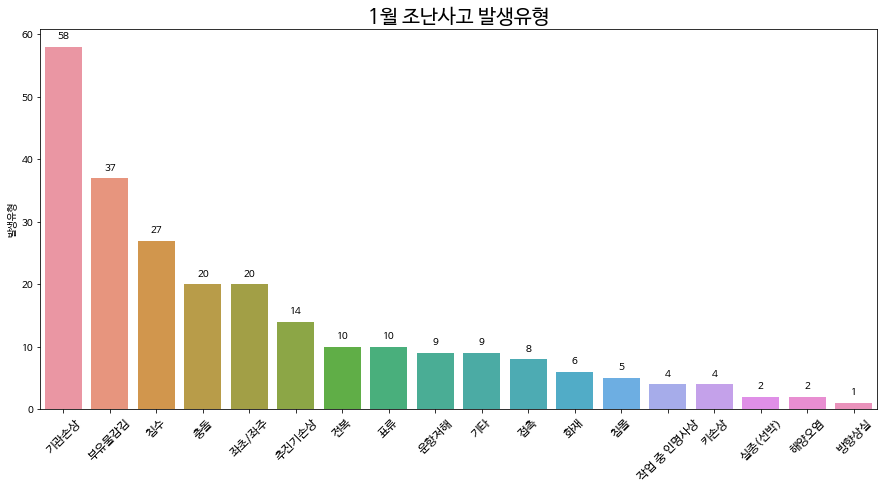

In [128]:
plt.figure(figsize = (15,7))
g = sns.barplot(data = df_type_1, x=df_type_1.index, y ='발생유형', ci=None)

for p in g.patches:
    g.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
  
plt.title('1월 조난사고 발생유형', fontsize = 20)
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

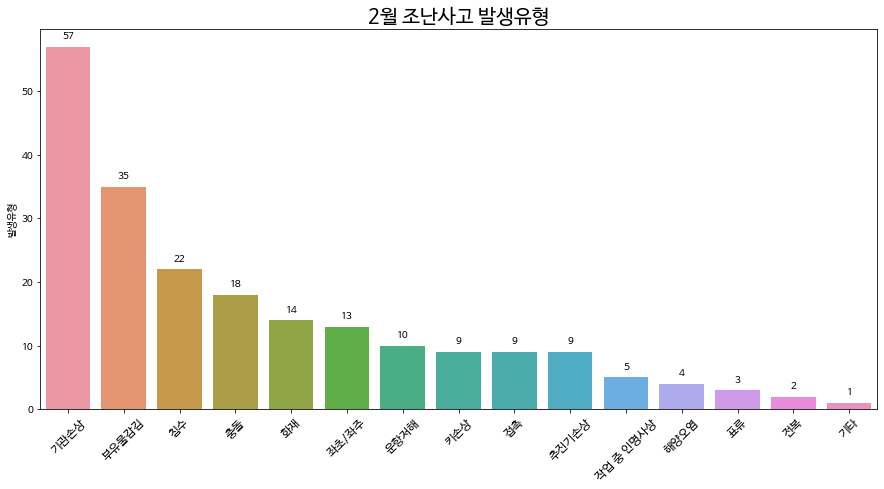

In [130]:
plt.figure(figsize = (15,7))
g = sns.barplot(data = df_type_2, x=df_type_2.index, y ='발생유형', ci=None)

for p in g.patches:
    g.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
  
plt.title('2월 조난사고 발생유형', fontsize = 20)
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

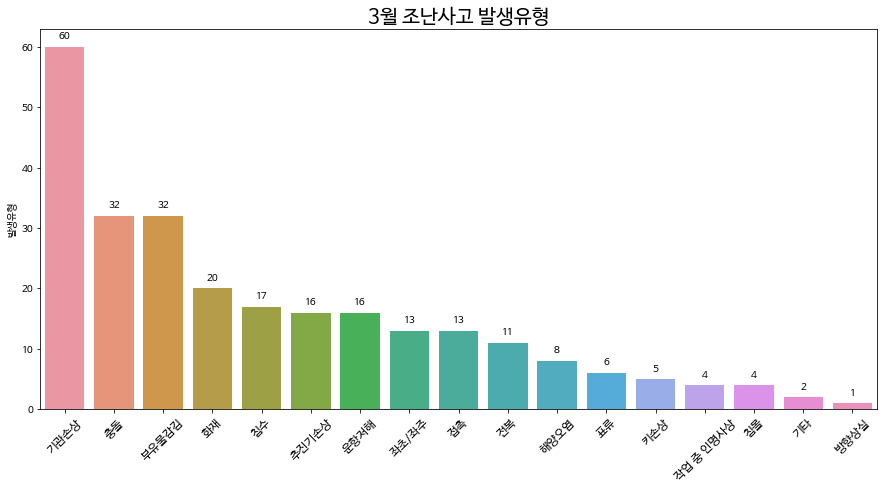

In [131]:
plt.figure(figsize = (15,7))
g = sns.barplot(data = df_type_3, x=df_type_3.index, y ='발생유형', ci=None)

for p in g.patches:
    g.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
  
plt.title('3월 조난사고 발생유형', fontsize = 20)
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

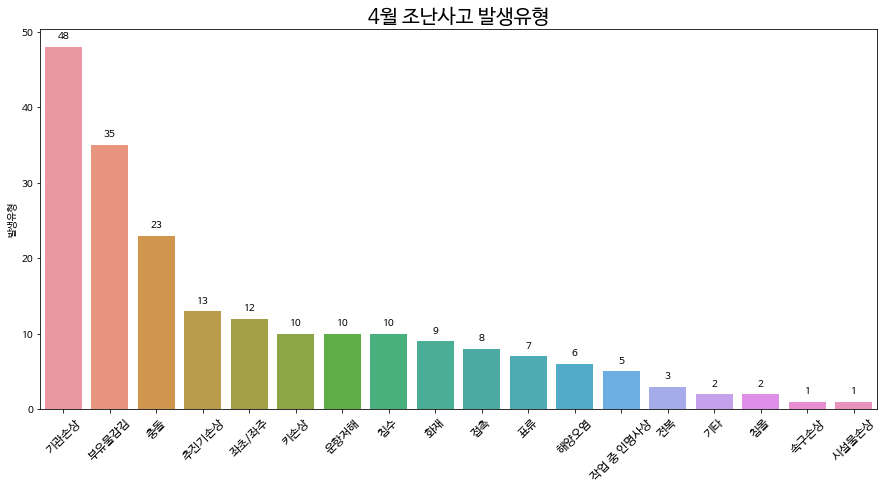

In [132]:
plt.figure(figsize = (15,7))
g = sns.barplot(data = df_type_4, x=df_type_4.index, y ='발생유형', ci=None)

for p in g.patches:
    g.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
  
plt.title('4월 조난사고 발생유형', fontsize = 20)
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

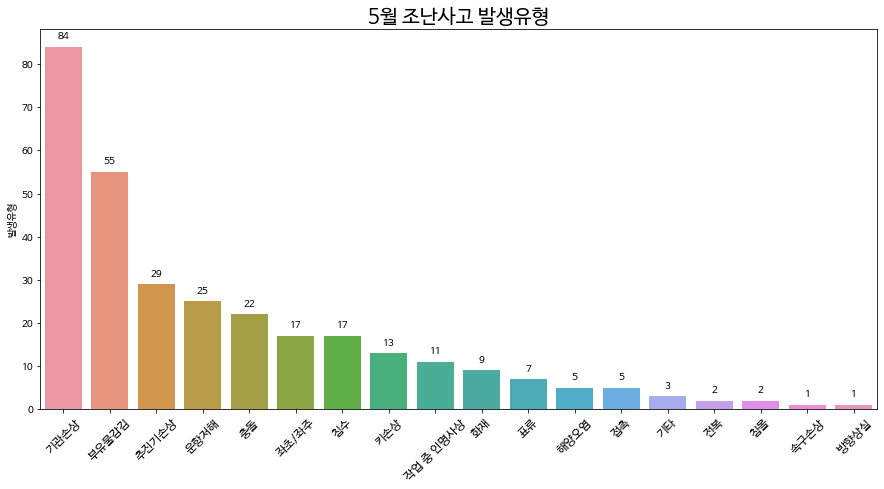

In [133]:
plt.figure(figsize = (15,7))
g = sns.barplot(data = df_type_5, x=df_type_5.index, y ='발생유형', ci=None)

for p in g.patches:
    g.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
  
plt.title('5월 조난사고 발생유형', fontsize = 20)
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

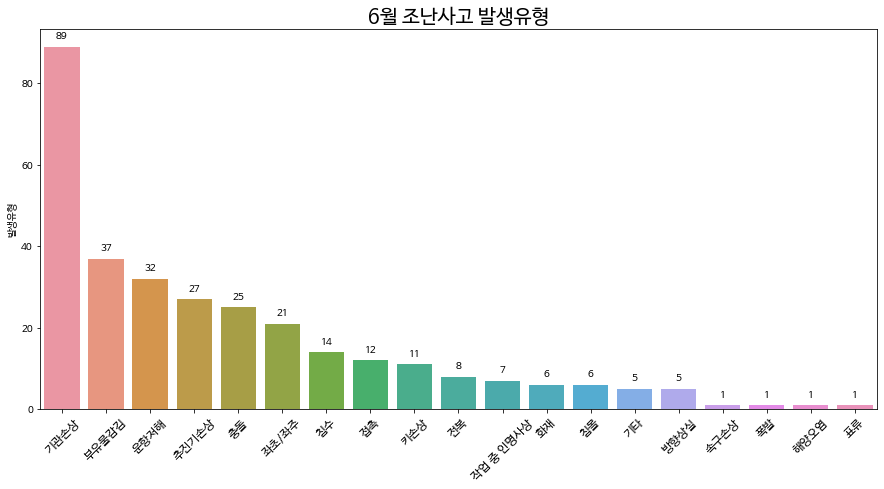

In [134]:
plt.figure(figsize = (15,7))
g = sns.barplot(data = df_type_6, x=df_type_6.index, y ='발생유형', ci=None)

for p in g.patches:
    g.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
  
plt.title('6월 조난사고 발생유형', fontsize = 20)
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

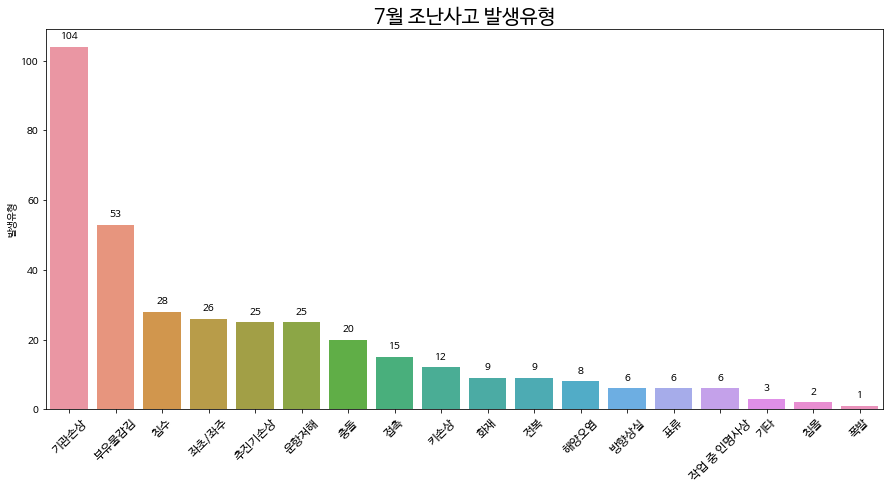

In [135]:
plt.figure(figsize = (15,7))
g = sns.barplot(data = df_type_7, x=df_type_7.index, y ='발생유형', ci=None)

for p in g.patches:
    g.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
  
plt.title('7월 조난사고 발생유형', fontsize = 20)
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

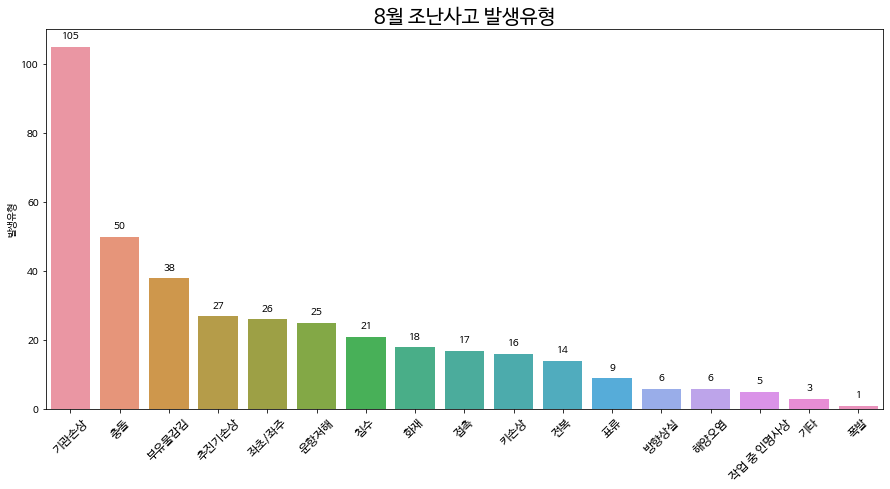

In [136]:
plt.figure(figsize = (15,7))
g = sns.barplot(data = df_type_8, x=df_type_8.index, y ='발생유형', ci=None)

for p in g.patches:
    g.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
  
plt.title('8월 조난사고 발생유형', fontsize = 20)
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

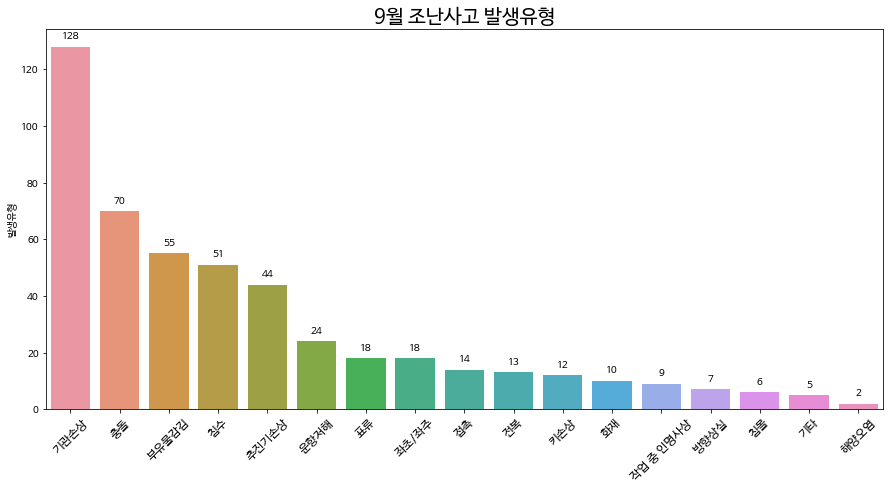

In [137]:
plt.figure(figsize = (15,7))
g = sns.barplot(data = df_type_9, x=df_type_9.index, y ='발생유형', ci=None)

for p in g.patches:
    g.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
  
plt.title('9월 조난사고 발생유형', fontsize = 20)
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

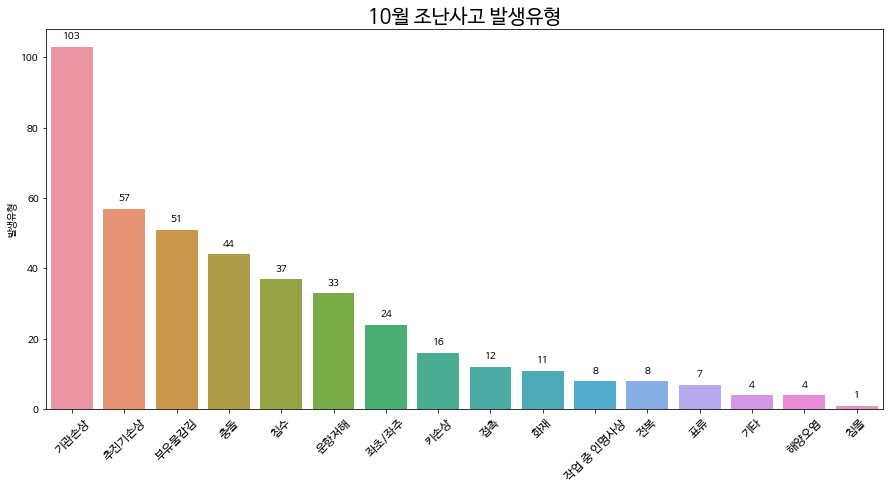

In [138]:
plt.figure(figsize = (15,7))
g = sns.barplot(data = df_type_10, x=df_type_10.index, y ='발생유형', ci=None)

for p in g.patches:
    g.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
  
plt.title('10월 조난사고 발생유형', fontsize = 20)
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

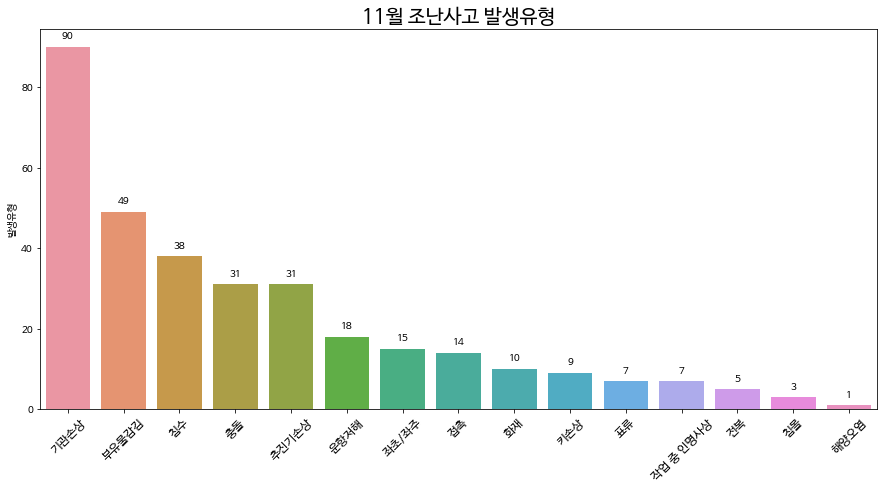

In [139]:
plt.figure(figsize = (15,7))
g = sns.barplot(data = df_type_11, x=df_type_11.index, y ='발생유형', ci=None)

for p in g.patches:
    g.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
  
plt.title('11월 조난사고 발생유형', fontsize = 20)
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

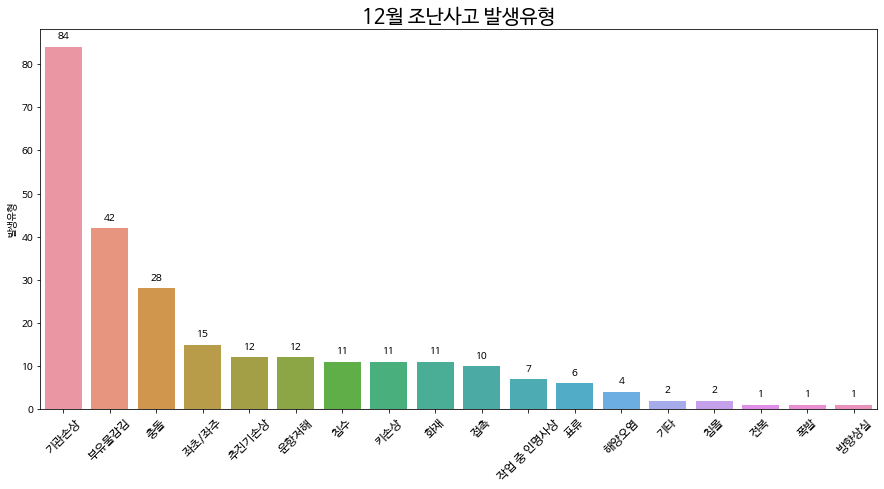

In [140]:
plt.figure(figsize = (15,7))
g = sns.barplot(data = df_type_12, x=df_type_12.index, y ='발생유형', ci=None)

for p in g.patches:
    g.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
  
plt.title('12월 조난사고 발생유형', fontsize = 20)
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

#2. 기상 상태별 데이터 상관관계 확인

## 기상 상태별 발생원인 확인



In [46]:
df['기상상태'].value_counts()

양호       3375
풍랑주의보     131
저시정       104
황천6급       49
태풍경보       33
황천5급       29
풍랑경보       27
황천4급       26
태풍주의보       4
Name: 기상상태, dtype: int64

In [47]:
df_weather_1 = df[df['기상상태']=='양호']['발생원인'].value_counts().to_frame()
df_weather_1

,발생원인
정비불량,1477
운항부주의,1210
관리소홀,228
안전부주의,130
연료고갈,97
배터리 방전,96
기타,89
기상악화,21
화기취급부주의,15
적재불량,12


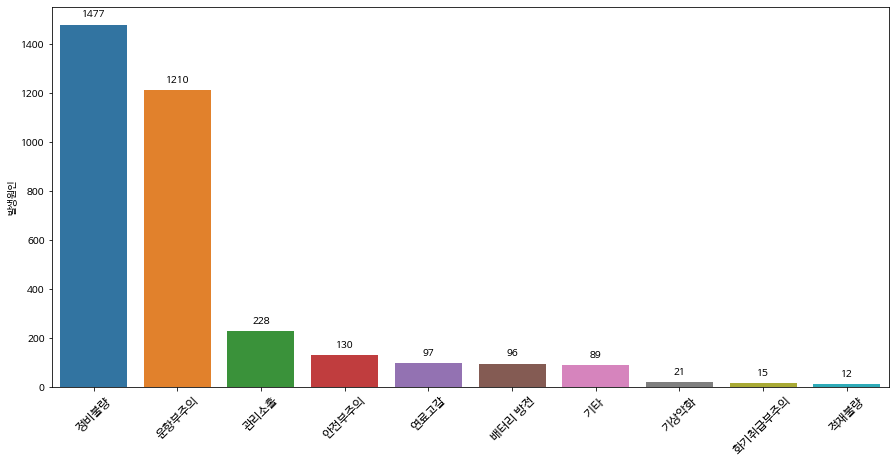

In [73]:
plt.figure(figsize = (15,7))
g = sns.barplot(data = df_weather_1, x=df_weather_1.index, y ='발생원인', ci=None)

for p in g.patches:
    g.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
  
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

In [49]:
df_weather_2 = df[df['기상상태']=='풍랑주의보']['발생원인'].value_counts().to_frame()
df_weather_2


,발생원인
기상악화,47
정비불량,26
운항부주의,19
관리소홀,16
기타,11
안전부주의,5
화기취급부주의,3
배터리 방전,2
연료고갈,1
적재불량,1


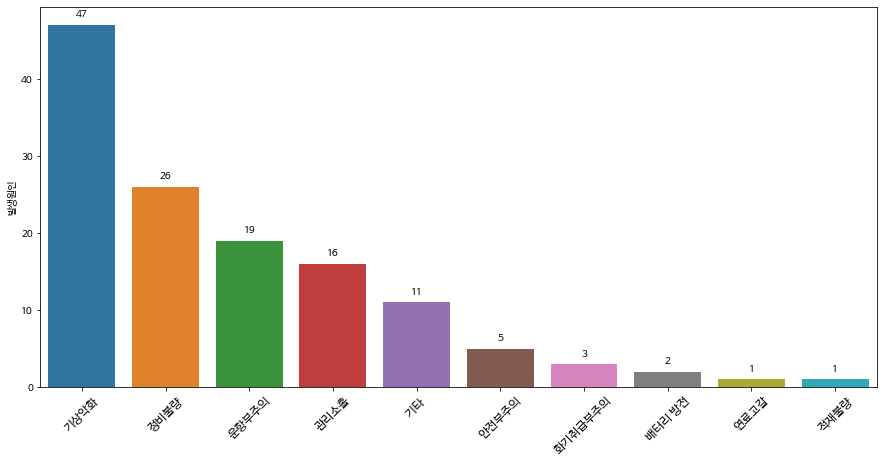

In [72]:
plt.figure(figsize = (15,7))
g = sns.barplot(data = df_weather_2, x=df_weather_2.index, y ='발생원인', ci=None)

for p in g.patches:
    g.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
  
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

In [51]:
df_weather_3 = df[df['기상상태']=='저시정']['발생원인'].value_counts().to_frame()
df_weather_3


,발생원인
운항부주의,36
정비불량,29
기상악화,20
관리소홀,9
배터리 방전,6
연료고갈,2
기타,1
안전부주의,1


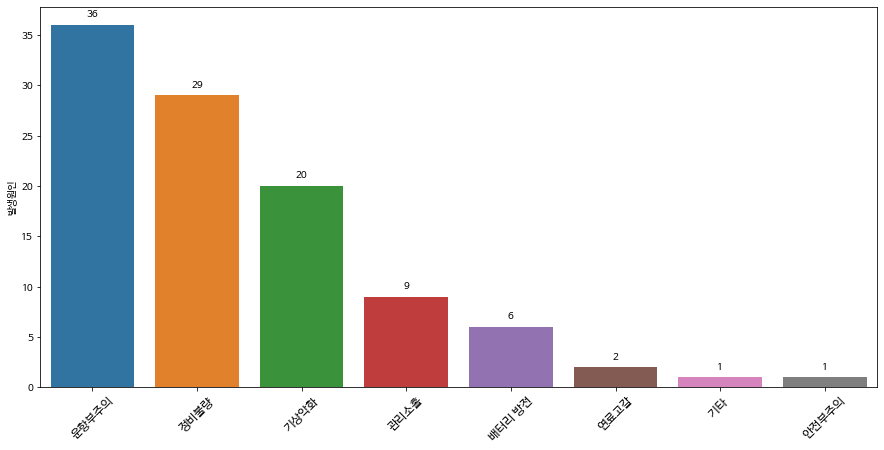

In [74]:
plt.figure(figsize = (15,7))
g = sns.barplot(data = df_weather_3, x=df_weather_3.index, y ='발생원인', ci=None)

for p in g.patches:
    g.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
  
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

In [53]:
df_weather_4 = df[df['기상상태']=='황천6급']['발생원인'].value_counts().to_frame()
df_weather_4

,발생원인
정비불량,21
기타,8
운항부주의,8
기상악화,6
관리소홀,4
배터리 방전,1
연료고갈,1


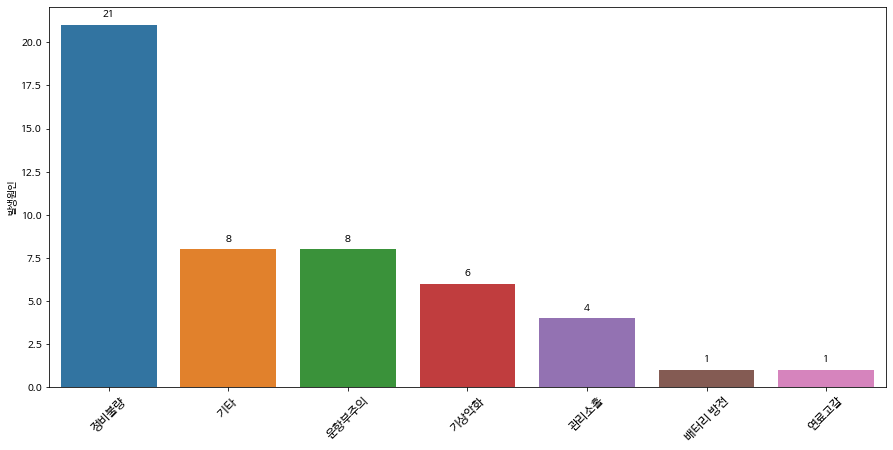

In [75]:
plt.figure(figsize = (15,7))
g = sns.barplot(data = df_weather_4, x=df_weather_4.index, y ='발생원인', ci=None)

for p in g.patches:
    g.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
  
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

In [55]:
df_weather_5 = df[df['기상상태']=='태풍경보']['발생원인'].value_counts().to_frame()
df_weather_5

,발생원인
기상악화,30
정비불량,2
운항부주의,1


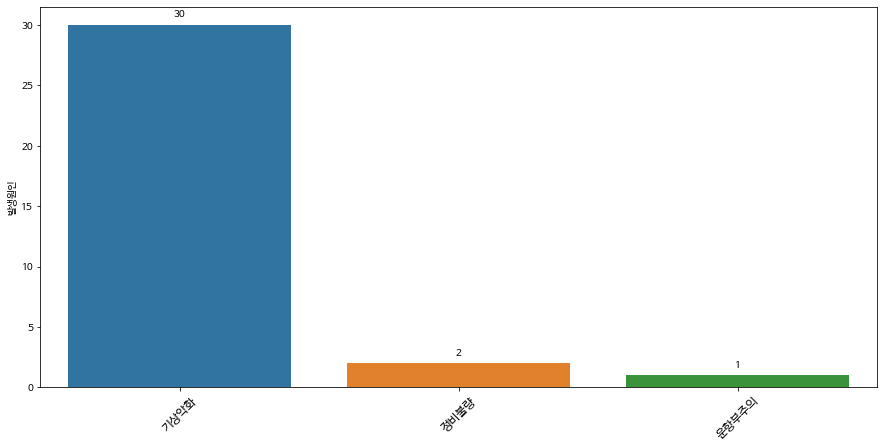

In [80]:
plt.figure(figsize = (15,7))
g = sns.barplot(data = df_weather_5, x=df_weather_5.index, y ='발생원인', ci=None)

for p in g.patches:
    g.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
  
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

In [56]:
# 황천5급       29
# 풍랑경보       27
# 황천4급       26
# 태풍주의보 


In [81]:
df_weather_6 = df[df['기상상태']=='황천5급']['발생원인'].value_counts().to_frame()
df_weather_6

,발생원인
운항부주의,10
기상악화,7
정비불량,7
관리소홀,2
기타,1
연료고갈,1
화기취급부주의,1


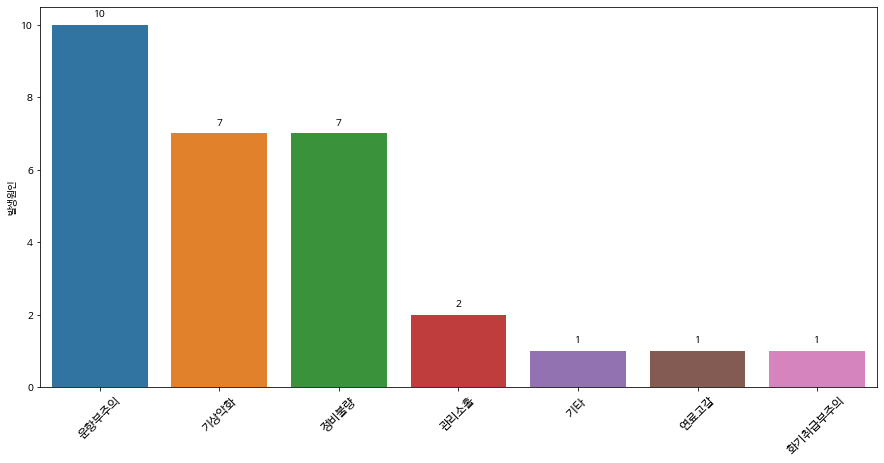

In [82]:
plt.figure(figsize = (15,7))
g = sns.barplot(data = df_weather_6, x=df_weather_6.index, y ='발생원인', ci=None)

for p in g.patches:
    g.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
  
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

In [83]:
df_weather_7 = df[df['기상상태']=='풍랑경보']['발생원인'].value_counts().to_frame()
df_weather_7

,발생원인
관리소홀,12
기상악화,10
정비불량,3
운항부주의,1
기타,1


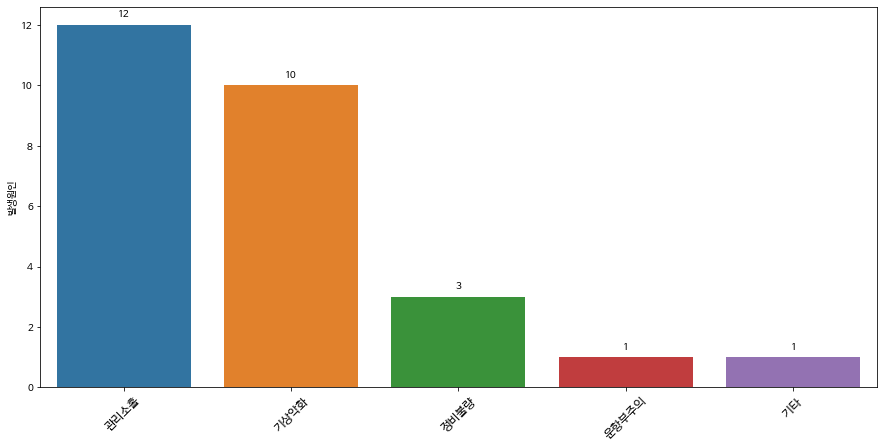

In [84]:
plt.figure(figsize = (15,7))
g = sns.barplot(data = df_weather_7, x=df_weather_7.index, y ='발생원인', ci=None)

for p in g.patches:
    g.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
  
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

In [86]:
df_weather_8 = df[df['기상상태']=='황천4급']['발생원인'].value_counts().to_frame()
df_weather_8

,발생원인
기상악화,19
운항부주의,3
관리소홀,3
정비불량,1


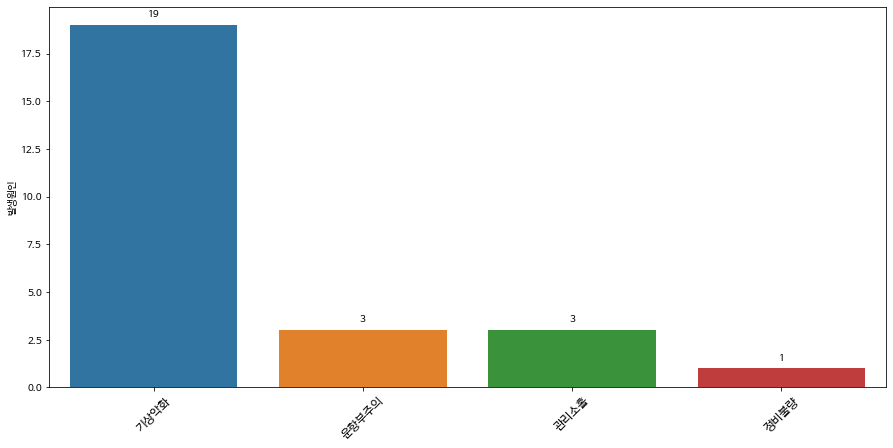

In [91]:
plt.figure(figsize = (15,7))
g = sns.barplot(data = df_weather_8, x=df_weather_8.index, y ='발생원인', ci=None)

for p in g.patches:
    g.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
  
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

In [90]:
df_weather_9 = df[df['기상상태']=='태풍주의보']['발생원인'].value_counts().to_frame()
df_weather_9

,발생원인
기상악화,3
운항부주의,1


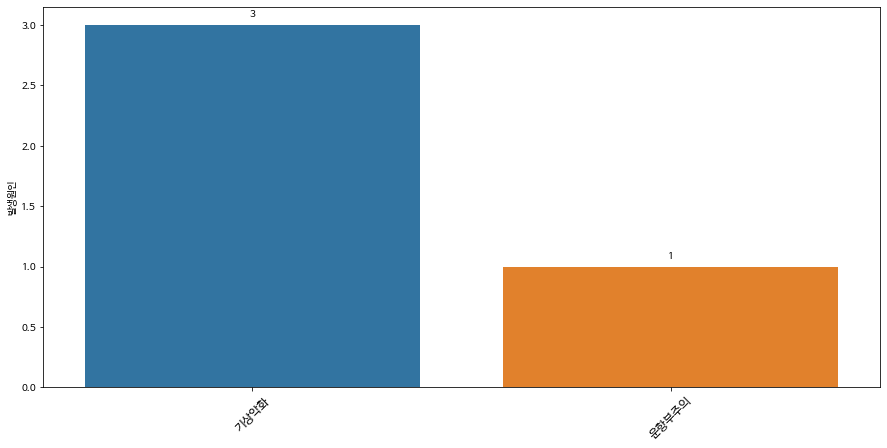

In [92]:
plt.figure(figsize = (15,7))
g = sns.barplot(data = df_weather_9, x=df_weather_9.index, y ='발생원인', ci=None)

for p in g.patches:
    g.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
  
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

## 기상 상태별 발생유형 확인

In [97]:
df_cause_1 = df[df['기상상태']=='양호']['발생유형'].value_counts().to_frame()
df_cause_1

,발생유형
기관손상,950
부유물감김,482
충돌,361
추진기손상,291
침수,225
운항저해,224
좌초/좌주,192
키손상,119
접촉,118
화재,111


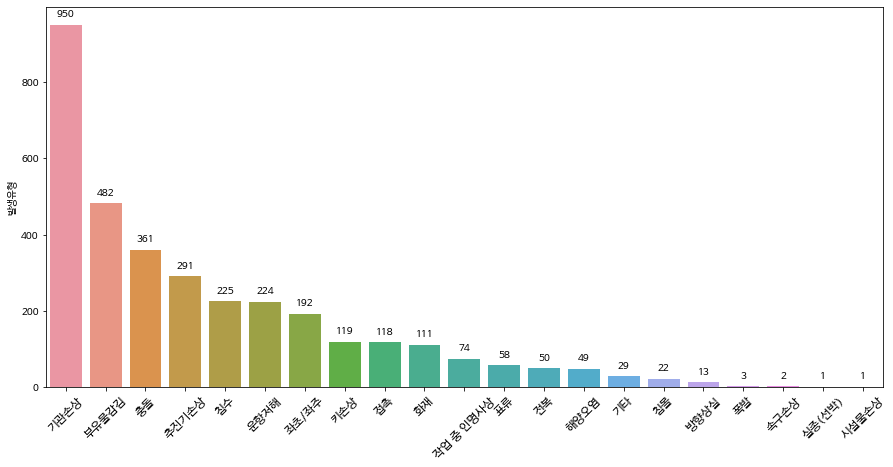

In [99]:
plt.figure(figsize = (15,7))
g = sns.barplot(data = df_cause_1, x=df_cause_1.index, y ='발생유형', ci=None)

for p in g.patches:
    g.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
  
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

In [100]:
df_cause_2 = df[df['기상상태']=='풍랑주의보']['발생유형'].value_counts().to_frame()
df_cause_2

,발생유형
침수,18
기관손상,17
부유물감김,16
표류,15
좌초/좌주,14
화재,13
전복,9
작업 중 인명사상,4
키손상,4
기타,4


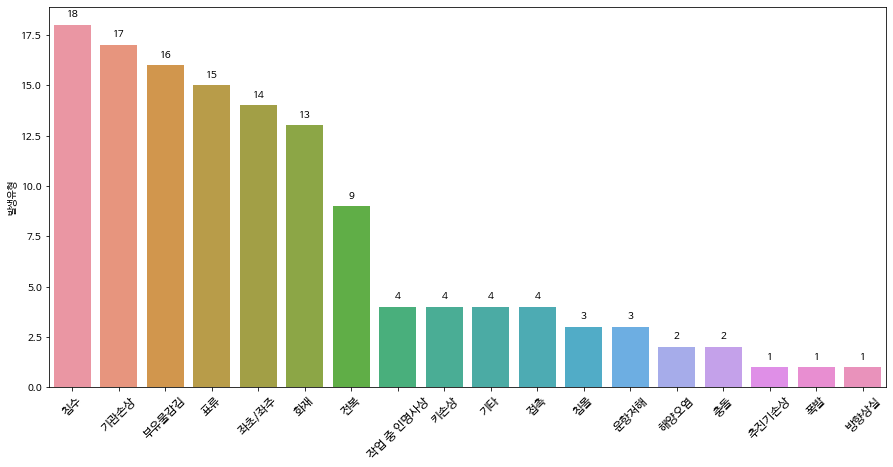

In [101]:
plt.figure(figsize = (15,7))
g = sns.barplot(data = df_cause_2, x=df_cause_2.index, y ='발생유형', ci=None)

for p in g.patches:
    g.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
  
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

In [102]:
df_cause_3 = df[df['기상상태']=='저시정']['발생유형'].value_counts().to_frame()
df_cause_3

,발생유형
기관손상,16
방향상실,14
충돌,12
좌초/좌주,9
부유물감김,9
운항저해,8
추진기손상,7
접촉,7
침수,6
전복,5


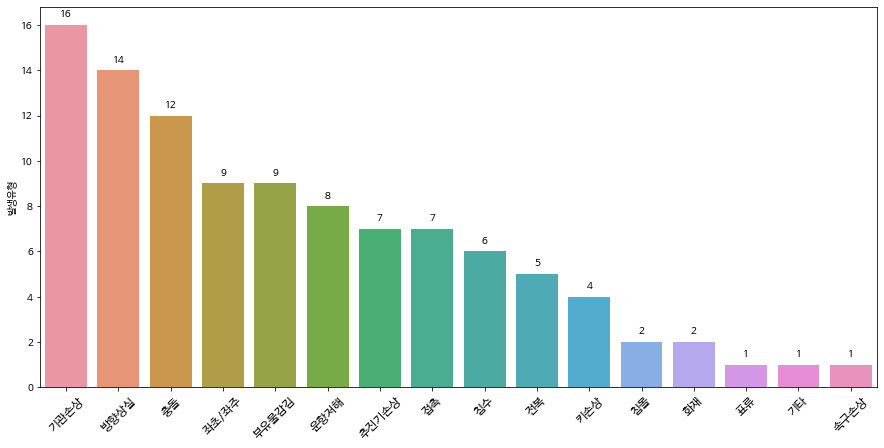

In [103]:
plt.figure(figsize = (15,7))
g = sns.barplot(data = df_cause_3, x=df_cause_3.index, y ='발생유형', ci=None)

for p in g.patches:
    g.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
  
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

In [104]:
df_cause_4 = df[df['기상상태']=='황천6급']['발생유형'].value_counts().to_frame()
df_cause_4

,발생유형
기관손상,18
화재,5
침수,4
부유물감김,4
운항저해,3
추진기손상,3
표류,2
침몰,2
충돌,2
접촉,2


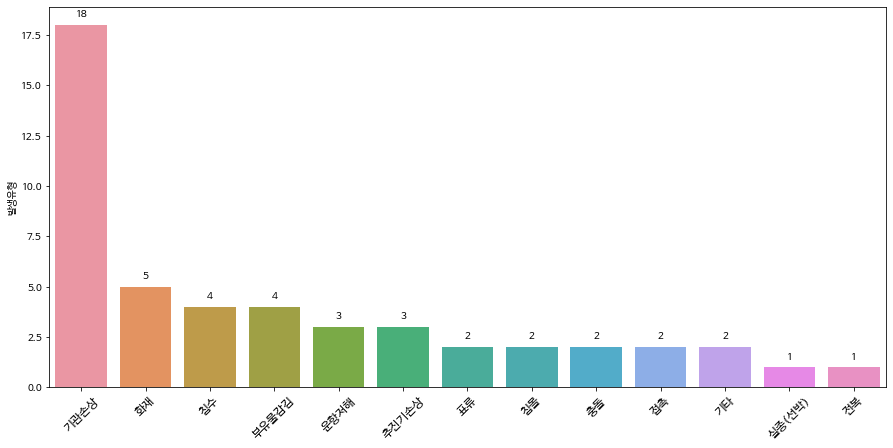

In [105]:
plt.figure(figsize = (15,7))
g = sns.barplot(data = df_cause_4, x=df_cause_4.index, y ='발생유형', ci=None)

for p in g.patches:
    g.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
  
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

In [108]:
df_cause_5 = df[df['기상상태']=='태풍경보']['발생유형'].value_counts().to_frame()
df_cause_5

,발생유형
침수,14
전복,5
표류,4
침몰,3
접촉,3
기타,1
좌초/좌주,1
기관손상,1
부유물감김,1


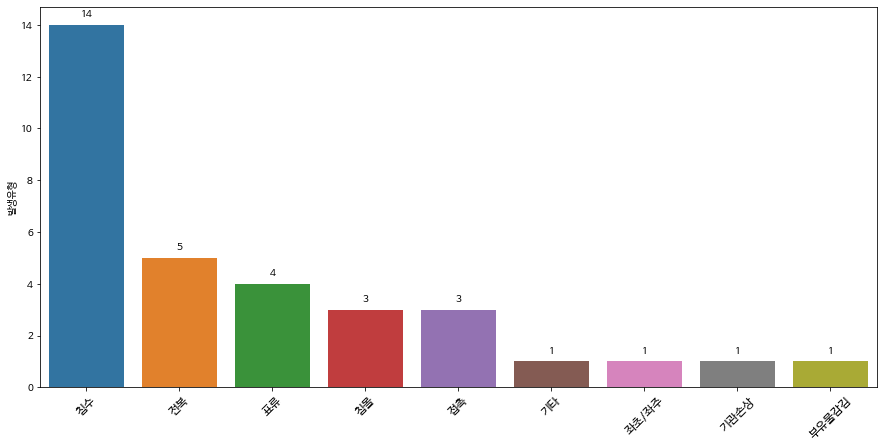

In [109]:
plt.figure(figsize = (15,7))
g = sns.barplot(data = df_cause_5, x=df_cause_5.index, y ='발생유형', ci=None)

for p in g.patches:
    g.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
  
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

In [111]:
df_cause_6 = df[df['기상상태']=='황천5급']['발생유형'].value_counts().to_frame()
df_cause_6

,발생유형
전복,5
기관손상,5
부유물감김,5
충돌,4
침수,2
화재,2
접촉,1
키손상,1
침몰,1
좌초/좌주,1


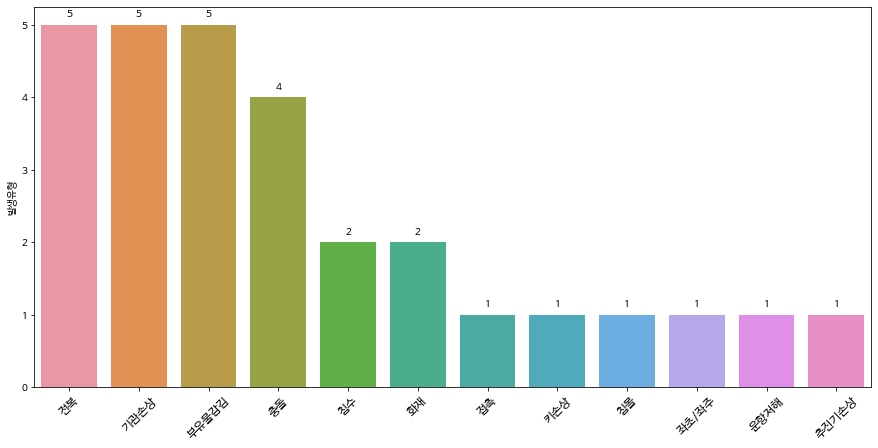

In [112]:
plt.figure(figsize = (15,7))
g = sns.barplot(data = df_cause_6, x=df_cause_6.index, y ='발생유형', ci=None)

for p in g.patches:
    g.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
  
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

In [114]:
df_cause_7 = df[df['기상상태']=='풍랑경보']['발생유형'].value_counts().to_frame()
df_cause_7

,발생유형
전복,9
침수,8
표류,3
기관손상,3
기타,2
좌초/좌주,2


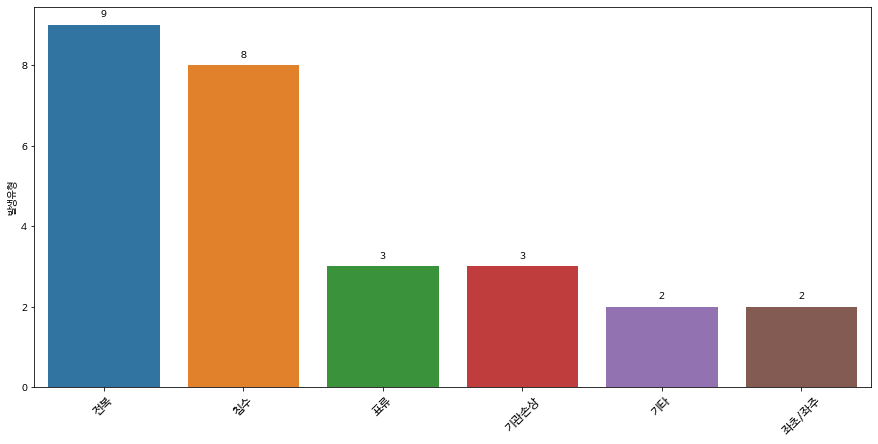

In [115]:
plt.figure(figsize = (15,7))
g = sns.barplot(data = df_cause_7, x=df_cause_7.index, y ='발생유형', ci=None)

for p in g.patches:
    g.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
  
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

In [116]:
df_cause_8 = df[df['기상상태']=='황천4급']['발생유형'].value_counts().to_frame()
df_cause_8

,발생유형
침수,16
표류,2
접촉,2
충돌,2
좌초/좌주,1
추진기손상,1
전복,1
부유물감김,1


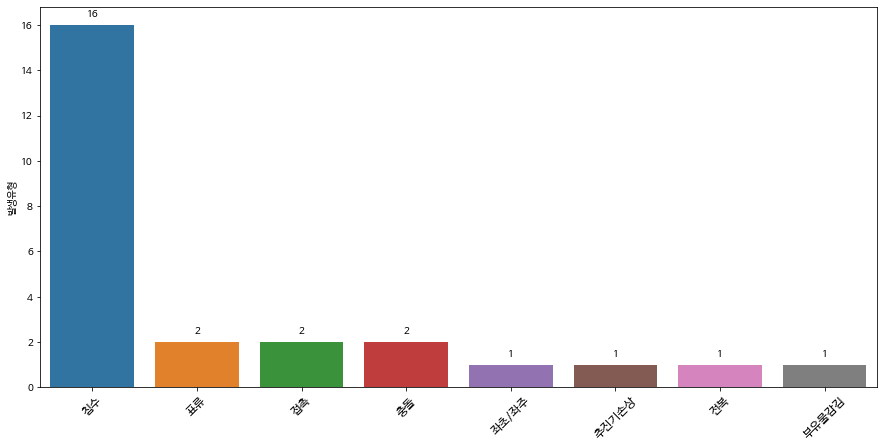

In [117]:
plt.figure(figsize = (15,7))
g = sns.barplot(data = df_cause_8, x=df_cause_8.index, y ='발생유형', ci=None)

for p in g.patches:
    g.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
  
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

In [118]:
df_cause_9 = df[df['기상상태']=='태풍주의보']['발생유형'].value_counts().to_frame()
df_cause_9

,발생유형
표류,2
전복,1
부유물감김,1


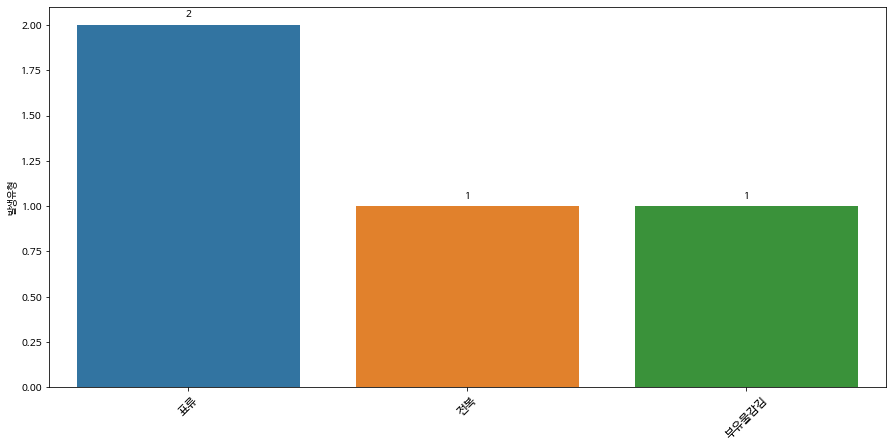

In [119]:
plt.figure(figsize = (15,7))
g = sns.barplot(data = df_cause_9, x=df_cause_9.index, y ='발생유형', ci=None)

for p in g.patches:
    g.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
              ha = 'center', va = 'center', fontsize=10, color = 'black', xytext=(0,10),
              textcoords = 'offset points')
  
plt.xticks(fontsize = 12, rotation = 45)
plt.show()

## 해역별 보기


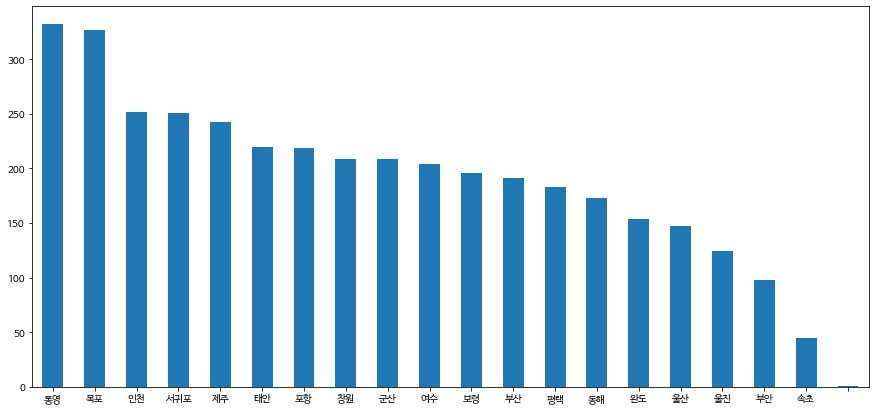

In [144]:
df['관할해경서'].value_counts().plot.bar(figsize = (15,7), rot = 0)